In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic_toy.csv")

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [8]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [9]:
X_train["Age_-1"] = X_train["Age"].fillna(-1)
X_train["Age_99"] = X_train["Age"].fillna(99)

/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
X_train["Fare_-11"] = X_train["Fare"].fillna(-11)
X_train["Fare_999.99"] = X_train["Fare"].fillna(999.99)

/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
X_train

,Age,Fare,Family,Age_-1,Age_99,Fare_mean,Fare_median,Fare_-11,Fare_999.99
331,45.5,28.5000,0,45.5,45.5,28.500000,28.5000,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.000000,13.0000,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.925000,7.9250,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.854200,7.8542,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.275000,31.2750,31.2750,31.2750
...,...,...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.0,21.0,7.650000,7.6500,7.6500,7.6500
270,NaN,31.0000,0,-1.0,99.0,31.000000,31.0000,31.0000,31.0000
860,41.0,NaN,2,41.0,41.0,32.517788,14.4000,-11.0000,999.9900
435,14.0,120.0000,3,14.0,14.0,120.000000,120.0000,120.0000,120.0000


In [15]:
print("The variance original value -",X_train["Age"].var())
print("The variance after imputing the mean of Age -",X_train["Age_-1"].var())
print("The variance after imputing the median of Age -",X_train["Age_99"].var())

print("The variance original value -",X_train["Fare"].var())
print("The variance after imputing the mean of Fare -",X_train["Fare_-11"].var())
print("The variance after imputing the median of Fare -",X_train["Fare_999.99"].var())

The variance original value - 210.2517072477435
The variance after imputing the mean of Age - 315.9955036260055
The variance after imputing the median of Age - 932.9665366701432
The variance original value - 2761.0314349486343
The variance after imputing the mean of Fare - 2712.2725787194377
The variance after imputing the median of Fare - 47617.51153257309


In [17]:
import seaborn as sns

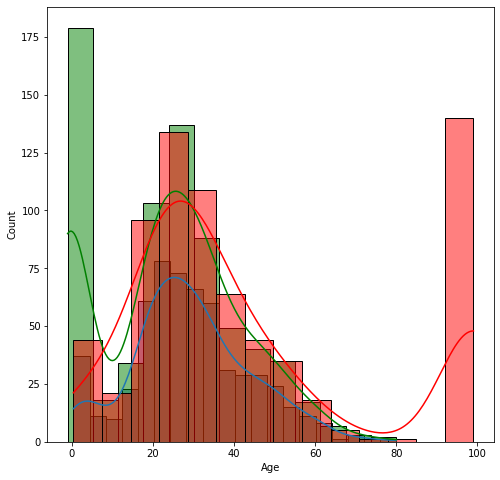

In [18]:
plt.figure(figsize=(8,8))

sns.histplot(X_train["Age"], kde = True)
sns.histplot(X_train["Age_-1"], color = "green", kde = True)
sns.histplot(X_train["Age_99"], color = "red", kde = True)
plt.show()

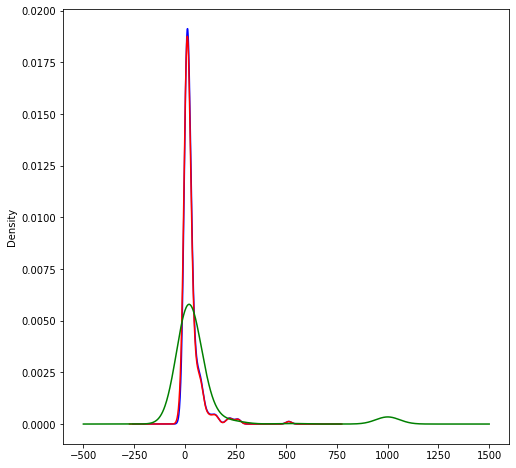

In [19]:
plt.figure(figsize=(8,8))

X_train["Fare"].plot(kind = "kde", color = "blue")
X_train["Fare_-11"].plot(kind = "kde", color = "red")
X_train["Fare_999.99"].plot(kind = "kde", color = "green")
plt.show()

In [20]:
X_train.cov()

,Age,Fare,Family,Age_-1,Age_99,Fare_mean,Fare_median,Fare_-11,Fare_999.99
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085,68.523576,130.556523
Fare,75.481375,2761.031435,18.599163,135.785804,-111.965046,2761.031435,2761.031435,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.034556,-6.941982,17.657433,17.672035,17.692507,16.877695
Age_-1,210.251707,135.785804,-5.034556,315.995504,-166.460682,128.910574,126.402311,122.885885,262.849342
Age_99,210.251707,-111.965046,-6.941982,-166.460682,932.966537,-106.295930,-103.507347,-99.597929,-255.203540
Fare_mean,71.193767,2761.031435,17.657433,128.910574,-106.295930,2621.232375,2621.232375,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,126.402311,-103.507347,2621.232375,2637.012482,2659.135200,1778.590050
Fare_-11,68.523576,2761.031435,17.692507,122.885885,-99.597929,2621.232375,2659.135200,2712.272579,597.258456
Fare_999.99,130.556523,2761.031435,16.877695,262.849342,-255.203540,2621.232375,1778.590050,597.258456,47617.511533


In [21]:
X_train.corr()

,Age,Fare,Family,Age_-1,Age_99,Fare_mean,Fare_median,Fare_-11,Fare_999.99
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232,0.084089,0.039947
Fare,0.091482,1.000000,0.207193,0.145071,-0.069365,1.000000,1.000000,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.168329,-0.135079,0.204981,0.204536,0.201912,0.045969
Age_-1,1.000000,0.145071,-0.168329,1.000000,-0.306576,0.141643,0.138471,0.132738,0.067762
Age_99,1.000000,-0.069365,-0.135079,-0.306576,1.000000,-0.067972,-0.065991,-0.062611,-0.038289
Fare_mean,0.088944,1.000000,0.204981,0.141643,-0.067972,1.000000,0.997003,0.983074,0.234622
Fare_median,0.087232,1.000000,0.204536,0.138471,-0.065991,0.997003,1.000000,0.994301,0.158722
Fare_-11,0.084089,1.000000,0.201912,0.132738,-0.062611,0.983074,0.994301,1.000000,0.052555
Fare_999.99,0.039947,1.000000,0.045969,0.067762,-0.038289,0.234622,0.158722,0.052555,1.000000


<AxesSubplot:>

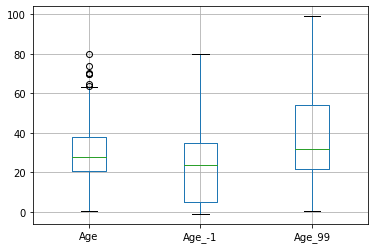

In [22]:
X_train[["Age","Age_-1","Age_99"]].boxplot()

<AxesSubplot:>

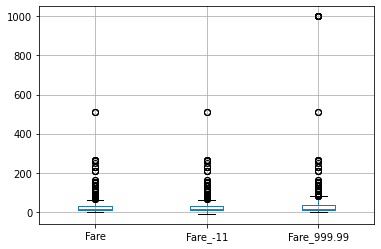

In [23]:
X_train[["Fare","Fare_-11","Fare_999.99"]].boxplot()

In [24]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
imputer1 = SimpleImputer(strategy="constant",fill_value=-1)
imputer2 = SimpleImputer(strategy="constant",fill_value=999.99)

In [26]:
trf = ColumnTransformer([("imputer1",imputer1,["Age"]),("imputer2",imputer2,["Fare"])], remainder="passthrough")

In [27]:
trf.fit(X_train1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999.99,
                                               strategy='constant'),
                                 ['Fare'])])

In [28]:
trf.named_transformers_["imputer1"].statistics_[0]


-1.0

In [29]:
trf.named_transformers_["imputer2"].statistics_[0]

999.99

In [30]:
X_train1 = trf.transform(X_train1)
X_test1 = trf.transform(X_test1)

In [34]:
pd.DataFrame(X_train1)

,0,1,2
0,45.5,28.5000,0.0
1,23.0,13.0000,0.0
2,32.0,7.9250,0.0
3,26.0,7.8542,1.0
4,6.0,31.2750,6.0
...,...,...,...
707,21.0,7.6500,0.0
708,-1.0,31.0000,0.0
709,41.0,999.9900,2.0
710,14.0,120.0000,3.0
